In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Probability: Mathematical and Computational Approaches

*Dan L. Nicolae* 

We will illustrate the concepts we want to introduce in this chapter with a classic probability problem called **the birthday problem**. Suppose you and a friend go to a party where there are 30 people (all unknown to both of you) and your friend wants to bet you that there are two people at that party who share their birthday. Would you be willing to take that bet? 

Your willingness to take the bet should be related to the chance of winning the bet. What do you think it is more likely to happen: finding a pair with shared birthdays or having 30 distinct birthdays? We will answer this using the language of probability; we will calculate the probability of the event that at least two people share the birthdays in a group of 30 people. Next section will show the rules we need for deriving this probability.

Let's start with a simpler problem: what is the probability that two people share their birthday. Can you justify the following result?

$$P(\mbox{two random people have the same birthday}) ~=~ \frac{1}{365}$$

Think about the assumptions you implicitly or explicitly made in your justification. 

We will show in the next section that, given a number of people, **n** (with $2\leq n\leq 365$), the probability, $P_n$, that that at least two share a birthday is given by:

$$P_n= 1-\frac{365\times364\times ...\times (365-n+1)}{365^n}$$

which can also be written as

$$P_n=1-\frac{365}{365}\times\frac{364}{365}\times\frac{363}{365}\times ...\times \frac{(365-n+1)}{365}$$

The asssumptions used for this calculation are:

a. 365 days in a year.

b. All days are equally likely.

c. Subjects have independent birthdays.

The function below calculates these probabilities. 

In [2]:
# a function that calculates the probability for 1<n<365
def birthday_prob(n):
    """Calculates the probability that at least 2 people out of n have the same birthday"""
    prob=1
    for i in np.arange(n):
        prob = prob * (365-i)/365
    return 1-prob


We can use this function to calculate the probability for the above (a group of 30 random people) scenario.

In [3]:
birthday_prob(30)

0.7063162427192686

The probability is close to 0.7 which means it is more likely your friend wins the bet.

Let's also look on how these probabilities change with $n$. We construct below a data frame that contains these probabilities for $n$ ranging from 2 to 100.

In [4]:
# Construct a data frame with the probabilities for a range of n's
number_people=np.arange(2,101,1)
b_probs= np.array([]) # an empty array
for i in number_people: b_probs= np.append(b_probs,birthday_prob(i))

Birthday_df=pd.DataFrame(
    {"Number of people":number_people,
     "Probability":b_probs})
Birthday_df.head(7)

,Number of people,Probability
0,2,0.002740
1,3,0.008204
2,4,0.016356
3,5,0.027136
4,6,0.040462
5,7,0.056236
6,8,0.074335


We construct below a line graph of these probabilities that shows the trend. We restrict the range of the values to $n\leq 60$ for better visualization.

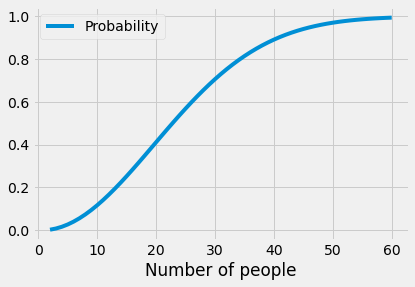

In [5]:
Birthday_df[Birthday_df["Number of people"]<=60].plot("Number of people","Probability");

Are the above probabilities surprising? Can you provide an intuition for them? Note that the number of people that yields the probability closest to a fair bet is 23.

In [6]:
birthday_prob(23)

0.5072972343239855